**THE SPARKS FOUNDATION**

**AUTHOR : Tarushikha Sharma**

**Task 2 : Prediction Using Unsupervised ML**

**Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

The task is build on Unsupervised Learning.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Uploading dataset on Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [8]:
# Read the csv file
data = pd.read_csv('Iris.csv')
print("Data Imported Successfully")
data.head()

Data Imported Successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Check if there are null values in the dataset or not
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# to print full information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.shape

(150, 6)

In [12]:
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [14]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [15]:
data.drop('Id', axis = 1, inplace = True)
data['ID'] = data.index+100
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,100
1,4.9,3.0,1.4,0.2,Iris-setosa,101
2,4.7,3.2,1.3,0.2,Iris-setosa,102
3,4.6,3.1,1.5,0.2,Iris-setosa,103
4,5.0,3.6,1.4,0.2,Iris-setosa,104


**Checking for Outliers**

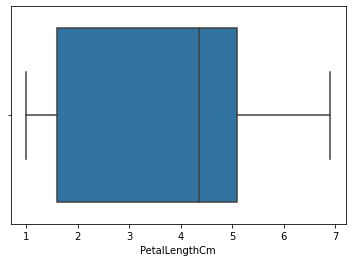

In [17]:
sns.boxplot(x=data['PetalLengthCm'], data=data)

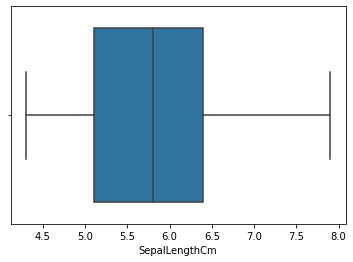

In [19]:
sns.boxplot(x=data['SepalLengthCm'], data=data)

**We can see there are outliers**

In [ ]:
# Outliers Treatment
q1 = data['SepalWidthCm'].quantile(0.01)
q2 = data['SepalWidthCm'].quantile(0.99)
data['SepalWidthCm'][data['SepalWidthCm'] <= q1] = q1
data['SepalWidthCm'][data['SepalWidthCm'] <= q2] = q2


**Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(data.drop(['ID','Species'], axis = 1))
df

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [21]:
df = pd.DataFrame(df)
df.columns = data.columns[:-2]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [24]:
x = data.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss  

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

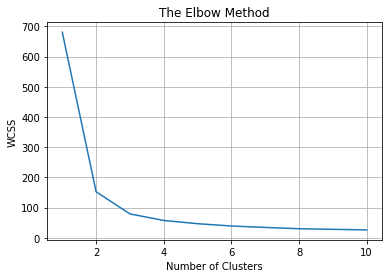

In [25]:
# Plotting the results onto a line graph,
# allowing us to aobserve 'The Elbow'
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

**From the above curve we can see that the Optimum clusters is where the elbow occurs so it is called as Elbow Method. It occurs when WCSS doesn't decrease significantly with every iteration. So, here we choose the number of clusters as 3**

**KMeans with K = 3**

In [27]:
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

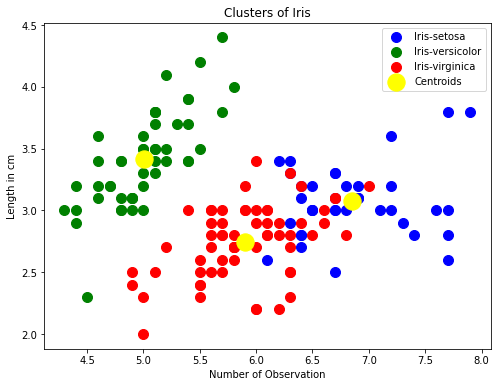

In [29]:
plt.figure(figsize = (8,6))
plt.scatter(x[pred ==0,0], x[pred == 0,1], s=100, c='blue', label='Iris-setosa')
plt.scatter(x[pred ==1,0], x[pred == 1,1], s=100, c='green', label='Iris-versicolor')
plt.scatter(x[pred ==2,0], x[pred == 2,1], s=100, c='red', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('Number of Observation')
plt.ylabel('Length in cm')
plt.legend()
plt.show()
